# Dataset Characteristics

Vorbereitung: Import der notwendigen Libraries und Laden des Datensatzes


In [1]:
# Import der Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np
import seaborn as sns
import missingno as msno
from fancyimpute import IterativeImputer, KNN

# Laden des gesamten Datensatzes
dataf = pd.read_csv("https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/0_DataPreparation/dataf.csv")

In [2]:
print("First few rows of the dataset:")
print(dataf.head())

First few rows of the dataset:
        Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01            0          NaN     NaN         8.0      9.8250   
1  2012-01-02            0          NaN     NaN         7.0      7.4375   
2  2012-01-03            0          NaN     NaN         8.0      5.5375   
3  2012-01-04            0          NaN     NaN         4.0      5.6875   
4  2012-01-05            0          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode                    Beschreibung  FerienSH  \
0                 14.0        58.0  leichter Spruehregen mit Regen       1.0   
1                 12.0         NaN                             NaN       1.0   
2                 18.0        63.0     durchgehend maessiger Regen       1.0   
3                 19.0        80.0           leichter Regenschauer       1.0   
4                 23.0        80.0           leichter Regenschauer       1.0   

   ...  Umschlag Weihnachtsmarkt Verb

In [3]:
print("\nBasic Information about the dataset:")
print(dataf.info())


Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Datum                  10437 non-null  object 
 1   KielerWoche            10437 non-null  int64  
 2   Warengruppe            9334 non-null   float64
 3   Umsatz                 9334 non-null   float64
 4   Bewoelkung             10048 non-null  float64
 5   Temperatur             10103 non-null  float64
 6   Windgeschwindigkeit    10103 non-null  float64
 7   Wettercode             7581 non-null   float64
 8   Beschreibung           7581 non-null   object 
 9   FerienSH               10399 non-null  float64
 10  Feiertag               10399 non-null  float64
 11  Uhrzeit                906 non-null    object 
 12  Heim_Auswärts          911 non-null    object 
 13  Umschlag               10437 non-null  int64  
 14  Weihnachtsmarkt 

In [4]:
# Umwandeln der Variablen in kategorielle falls notwendig
categorical_columns = ['KielerWoche', 'Weihnachtsmarkt', 'Umschlag', 'Feiertag', 'FerienSH',
                       'Warengruppe', 'Wochentag_MDMDFSS', 'Wochenende', 'Regen', 'Schnee',
                       'Jahreszeit_FSHW', 'THW_heimspiel']

# Konvertiere die Spalten zu kategorischen Variablen
dataf[categorical_columns] = dataf[categorical_columns].astype('category')
print(dataf.dtypes)

Datum                      object
KielerWoche              category
Warengruppe              category
Umsatz                    float64
Bewoelkung                float64
Temperatur                float64
Windgeschwindigkeit       float64
Wettercode                float64
Beschreibung               object
FerienSH                 category
Feiertag                 category
Uhrzeit                    object
Heim_Auswärts              object
Umschlag                 category
Weihnachtsmarkt          category
Verbraucherpreisindex     float64
Regen                    category
Schnee                   category
Wochentag_MDMDFSS        category
Wochenende               category
Jahreszeit_FSHW          category
Temperatur_Kategorie       object
THW_heimspiel            category
dtype: object


## Allgemeine Übersicht über den Datensatz

Beschreibung und allgemeine Zusammenfassung des Datensatzes

In [5]:

print(f"Anzahl der Reihen: {dataf.shape[0]}")
print(f"Anzahl der Spalten: {dataf.shape[1]}")
print("\nSpaltennamen und Datentypen:")
print(dataf.dtypes)
print("\nVorschau des Datensatzes:")
print(dataf.head())


#print(dataf.describe())    -> so allgemein für alles sinnvoll?

Anzahl der Reihen: 10437
Anzahl der Spalten: 23

Spaltennamen und Datentypen:
Datum                      object
KielerWoche              category
Warengruppe              category
Umsatz                    float64
Bewoelkung                float64
Temperatur                float64
Windgeschwindigkeit       float64
Wettercode                float64
Beschreibung               object
FerienSH                 category
Feiertag                 category
Uhrzeit                    object
Heim_Auswärts              object
Umschlag                 category
Weihnachtsmarkt          category
Verbraucherpreisindex     float64
Regen                    category
Schnee                   category
Wochentag_MDMDFSS        category
Wochenende               category
Jahreszeit_FSHW          category
Temperatur_Kategorie       object
THW_heimspiel            category
dtype: object

Vorschau des Datensatzes:
        Datum KielerWoche Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01           0 

### Missing Values
Übersicht und Identifizieren von Missing Values 

In [6]:
print("\nMissing Values")
print("----------------")
missing_values = dataf.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values
----------------
Warengruppe              1103
Umsatz                   1103
Bewoelkung                389
Temperatur                334
Windgeschwindigkeit       334
Wettercode               2856
Beschreibung             2856
FerienSH                   38
Feiertag                   38
Uhrzeit                  9531
Heim_Auswärts            9526
Verbraucherpreisindex      30
Temperatur_Kategorie      335
dtype: int64


# Visualisierung der Verteilung der einzelnen Features/ Variablen in Histogrammen

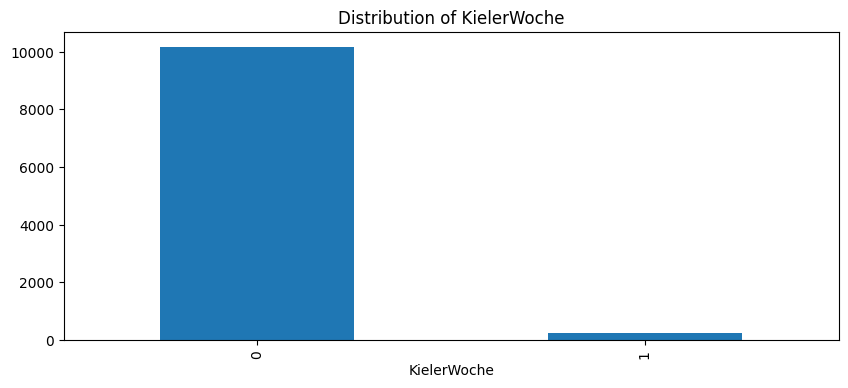

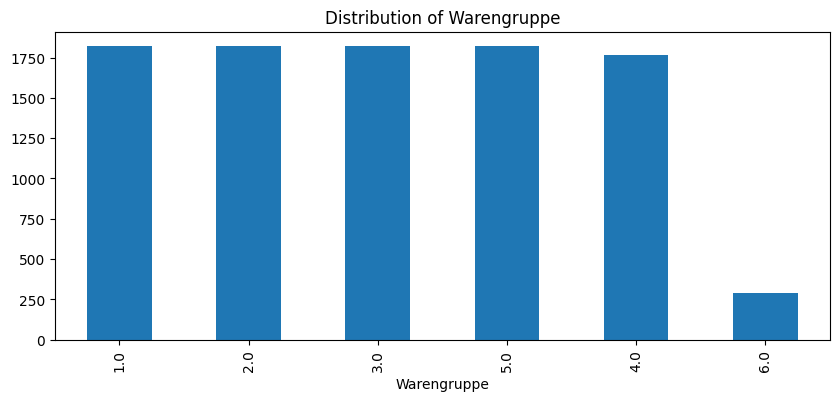

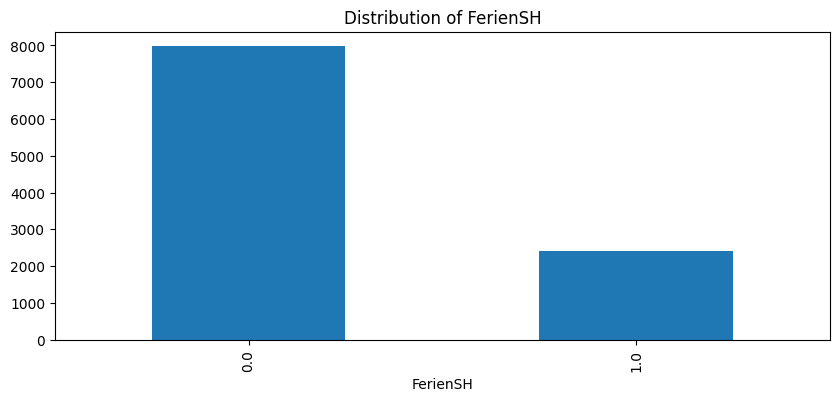

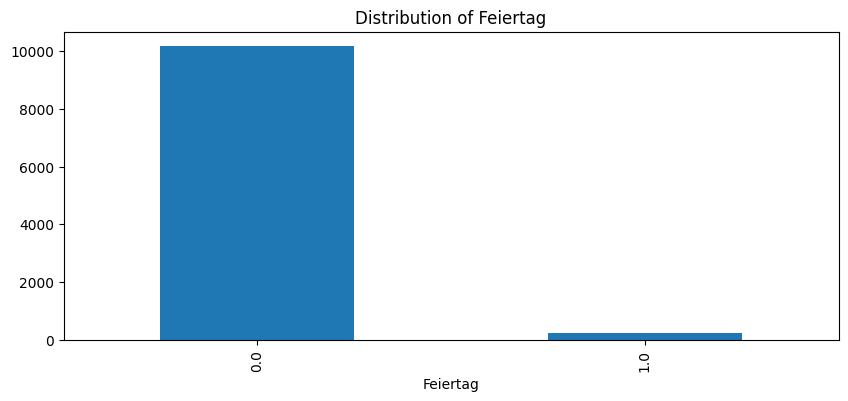

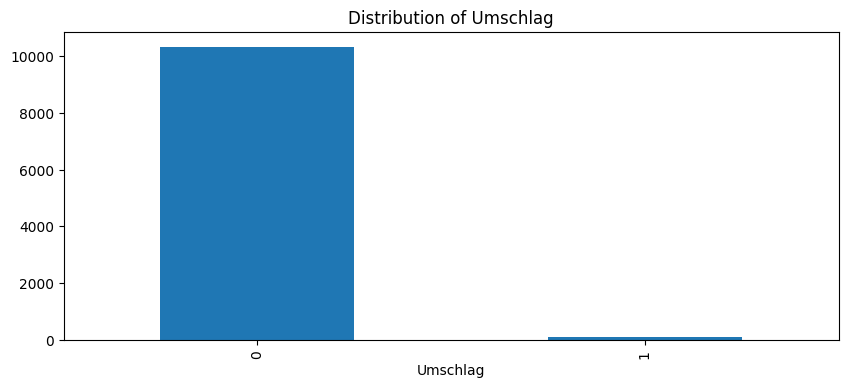

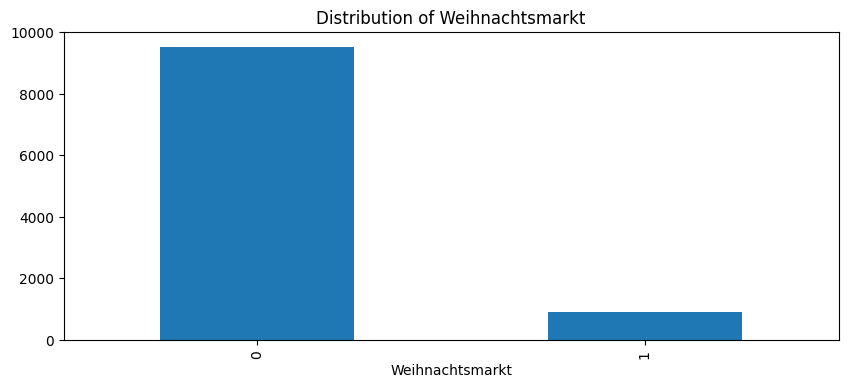

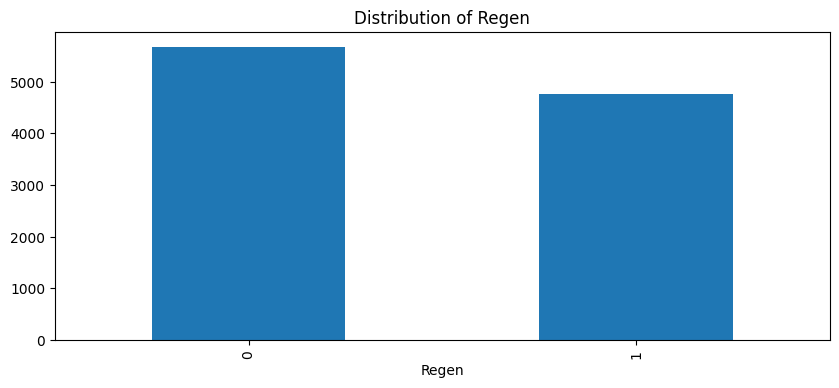

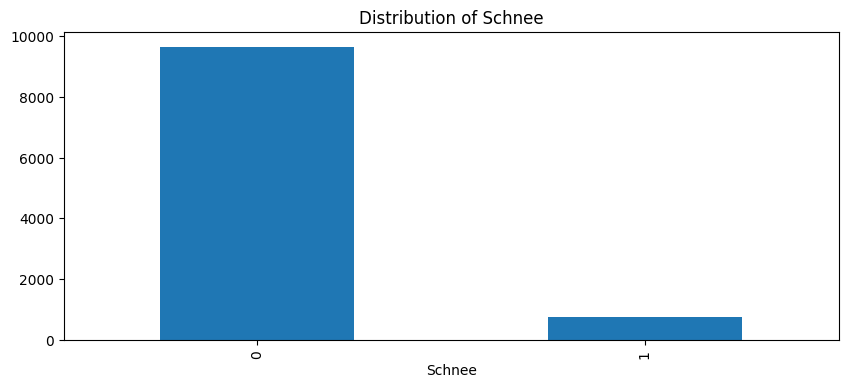

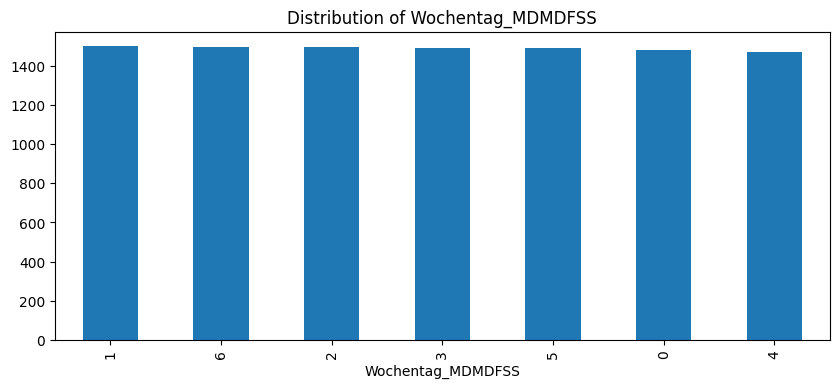

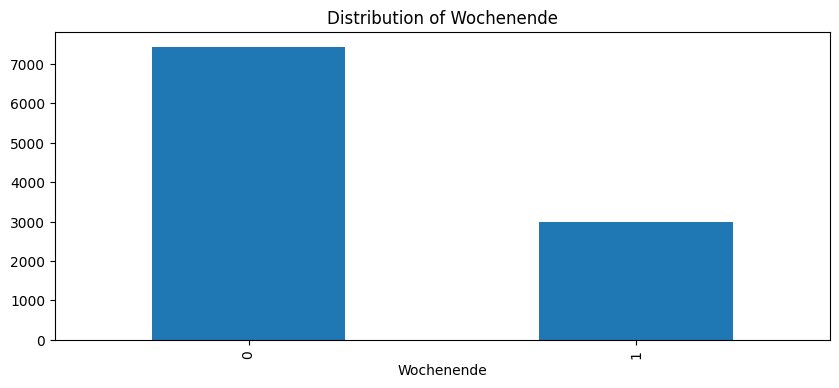

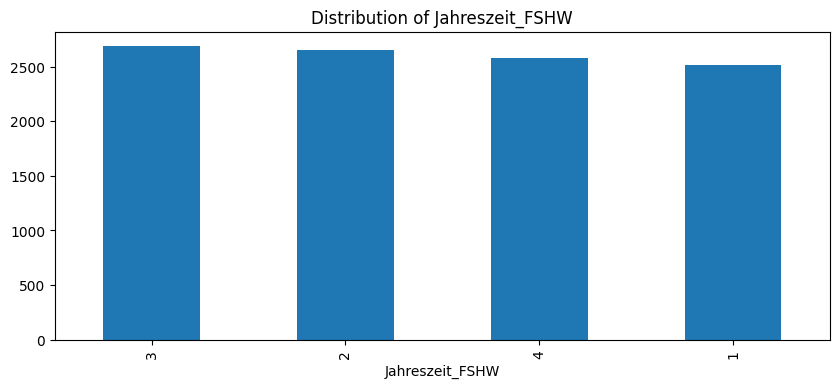

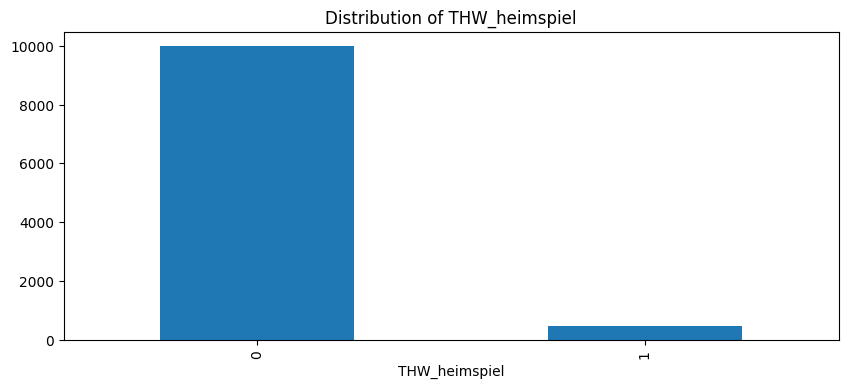

In [7]:
# Distribution of categorical features
categorical_features = dataf.select_dtypes(include=['category'])
for column in categorical_features.columns:
    plt.figure(figsize=(10, 4))
    dataf[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.show()

### Temperatur

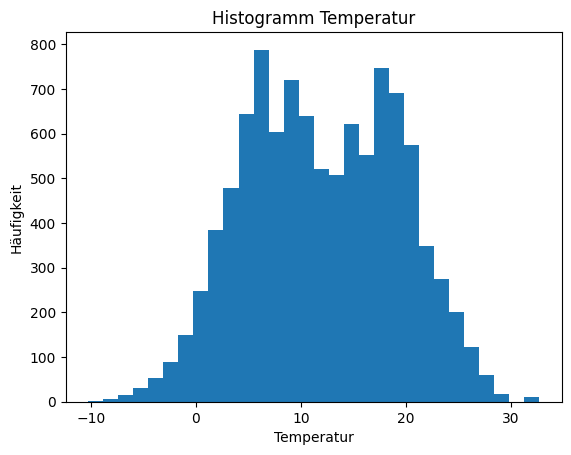

Descriptive Statistics for Temperatur:
count    10103.000000
mean        12.014560
std          7.212466
min        -10.250000
25%          6.250000
50%         11.625000
75%         17.875000
max         32.671428
Name: Temperatur, dtype: float64
95% Confidence interval for the mean of Temperatur: (11.873903826598154, 12.155216138560709)


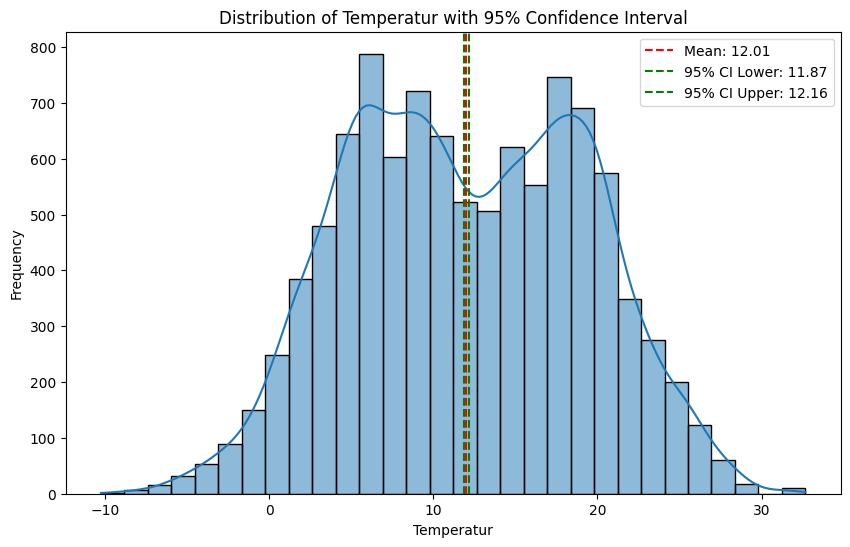

In [21]:
# Visuelle Darstellung der Variable Temperatur (Nummerische Variable)
plt.hist(dataf['Temperatur'], bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Häufigkeit')
plt.show()

# Descriptive Statistics for Umsatz
print("Descriptive Statistics for Temperatur:")
desc = dataf['Temperatur'].describe()
print(desc)

# Compute Confidence Interval for the Mean
confidence_level = 0.95
degrees_freedom = len(dataf['Temperatur'].dropna()) - 1
sample_mean = np.mean(dataf['Temperatur'].dropna())
sample_standard_error = stats.sem(dataf['Temperatur'].dropna())
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(f"95% Confidence interval for the mean of Temperatur: {confidence_interval}")

# Histogram for Umsatz with Confidence Interval
plt.figure(figsize=(10, 6))
sns.histplot(dataf['Temperatur'].dropna(), bins=30, kde=True)
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.2f}')
plt.title('Distribution of Temperatur with 95% Confidence Interval')
plt.xlabel('Temperatur')
plt.ylabel('Frequency')
plt.legend()
plt.show()

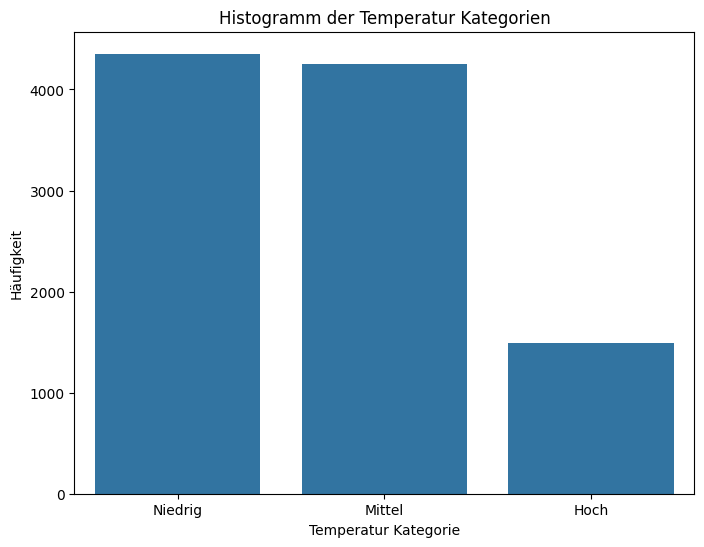

In [6]:
# Erstellen des Histograms für Temperatur Kategorien
plt.figure(figsize=(8, 6))
sns.countplot(data=dataf, x='Temperatur_Kategorie', order=['Niedrig', 'Mittel', 'Hoch'])
plt.xlabel('Temperatur Kategorie')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Temperatur Kategorien')
plt.show()

## Umsatz 
Numerische Variable

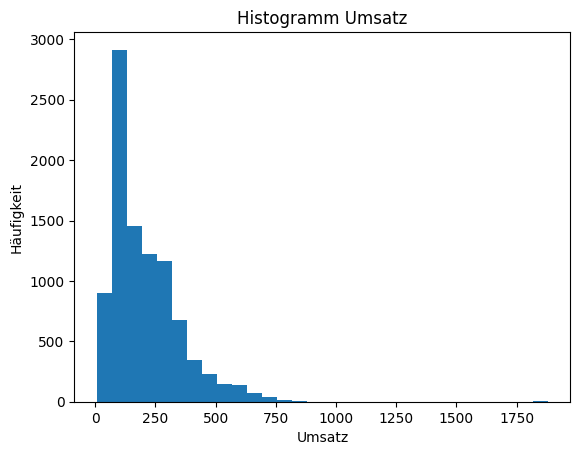

In [7]:
plt.hist(dataf['Umsatz'], bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Umsatz')
plt.xlabel('Umsatz')
plt.ylabel('Häufigkeit')
plt.show()


## Warengruppe 
Kategorielle Variable

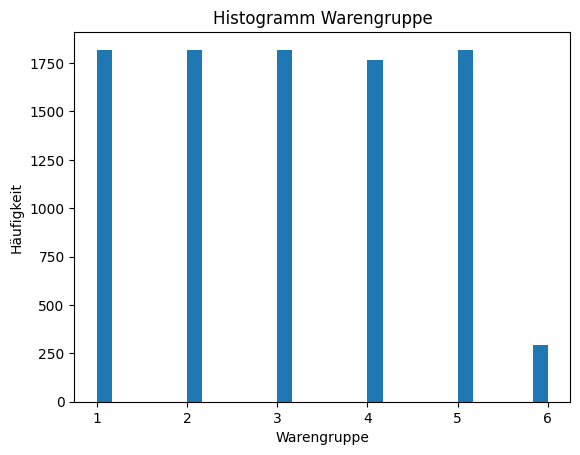

In [8]:
# Warengruppe
plt.hist(dataf['Warengruppe'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Häufigkeit')
plt.show()

## Windgeschwindigkeit
Numerische Variable

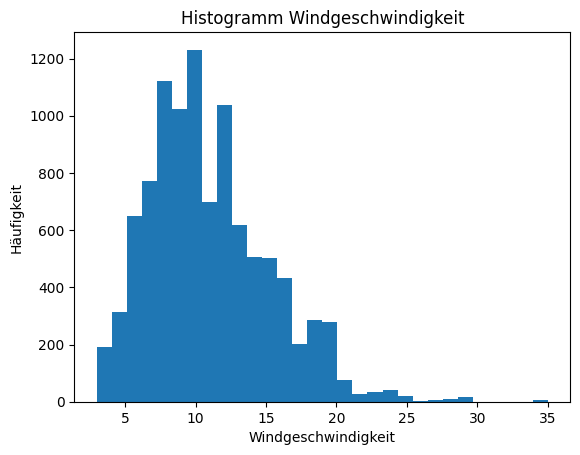

In [9]:
# Windgeschwindigkeit - 
plt.hist(dataf['Windgeschwindigkeit'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Windgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Häufigkeit')
plt.show()

## Wettercode
Kategorielle Variable

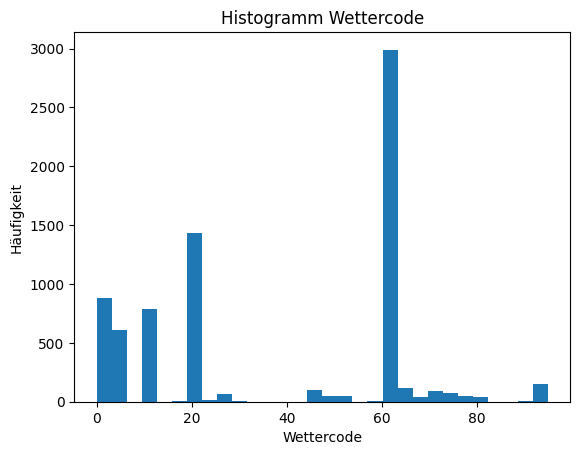

In [10]:
# Wettercode - Kategorielle Variable
plt.hist(dataf['Wettercode'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Wettercode')
plt.xlabel('Wettercode')
plt.ylabel('Häufigkeit')
plt.show()

## Verbraucherpreisindex
Numerische Variable

In [8]:
# Verbraucherpreisindex - Numerische Variable

## Regen
Kategoriale Variable

In [9]:
# Regen - Kategorielle Variable

## Schnee
Kategorielle Variable

In [10]:
# Schnee - Kategorielle Variable

## Ferientage in Schleswig Holstein
Kategorielle Variable

In [ ]:
# Ferien SH

## Feiertage
Kategorielle Variable

In [ ]:
# Feiertage

## Weihnachtsmarkt
Kategorielle Variable

In [ ]:
# Weihnachtsmarkt - Kategorielle Variable

## Umschlag
Kategorielle Variable

In [ ]:
# Umschlag

## THW Heimspiele

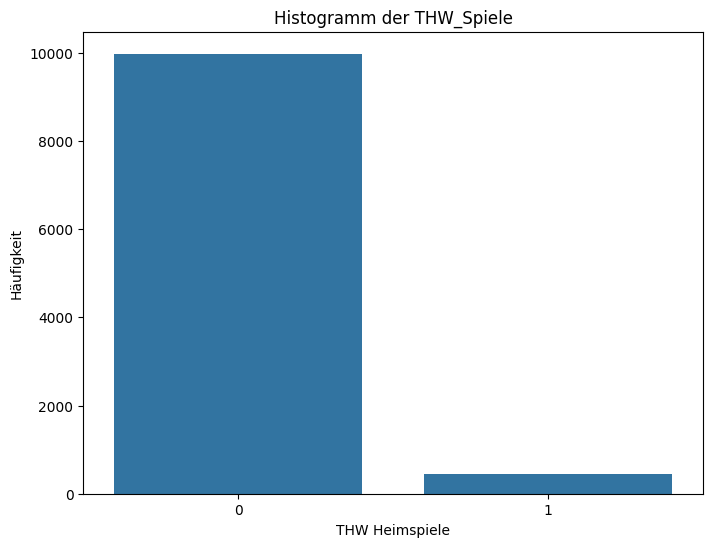

In [11]:
# THW Daten # ergibt so natürlich gar keinen Sinn

# Erstellen des Histograms
plt.figure(figsize=(8, 6))
sns.countplot(data=dataf, x='THW_heimspiel')
plt.xlabel('THW Heimspiele')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der THW_Spiele')
plt.show()


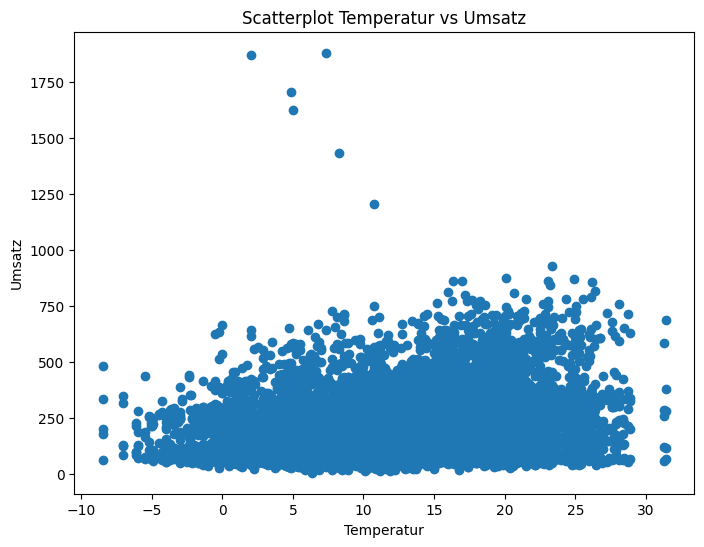

In [ ]:
## SCATTERPLOTS
#Temperatur vs. Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(dataf['Temperatur'], dataf['Umsatz'], label='Daten')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Scatterplot Temperatur vs Umsatz')
plt.show()


In [ ]:

## Aus meiner Homework  IN PROGRESS
# Histogram und Grundparameter Statistik für Wettervariablen erstellen
# Liste der Wettervariablen
#weather_variables = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

# Schleife über jede Wettervariable
#for var in weather_variables:
#    # Histogramm erstellen
#    plt.hist(merged_df[var], bins=10, color='skyblue', edgecolor='black')
#    plt.xlabel(var)
#    plt.ylabel('Häufigkeit')
#    plt.title(f'Histogramm der {var}')
#    plt.grid(True)
#    plt.show()
    
    # Grundlegende Parameter berechnen
#    mean_var = merged_df[var].mean()
#    median_var = merged_df[var].median()
#    min_var = merged_df[var].min()
#    max_var = merged_df[var].max()
#    std_var = merged_df[var].std()
    
    # Statistische Grundparameter ausgeben
#    print(f"\nStatistische Grundparameter für {var}:")
#    print("Mittlerer Wert:", mean_var)
#    print("Median:", median_var)
#    print("Minimum:", min_var)
#    print("Maximum:", max_var)
#    print("Standardabweichung:", std_var)
#    print("-----------------------------")

UsageError: Cell magic `%%Python` not found.


In [ ]:
#KORRELATIONSMATRIX   - aus Lindas Data Praparation  IN PROGRESS

# Nicht-numerische und transformierte Spalten aus dem DataFrame entfernen
#drop_df = dataf.drop(['Wochentag', 'logUmsatz','asUmsatz', 'Beschreibung', 'Uhrzeit_x', 'Heim_Auswärts_x', 'Uhrzeit_y', 'Heim_Auswärts_y'], axis=1)

# Korrelationsmatrix berechnen
#corr_matrix = drop_df.corr()

# Korrelationsmatrix plotten
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('Korrelationsmatrix')
#plt.show()

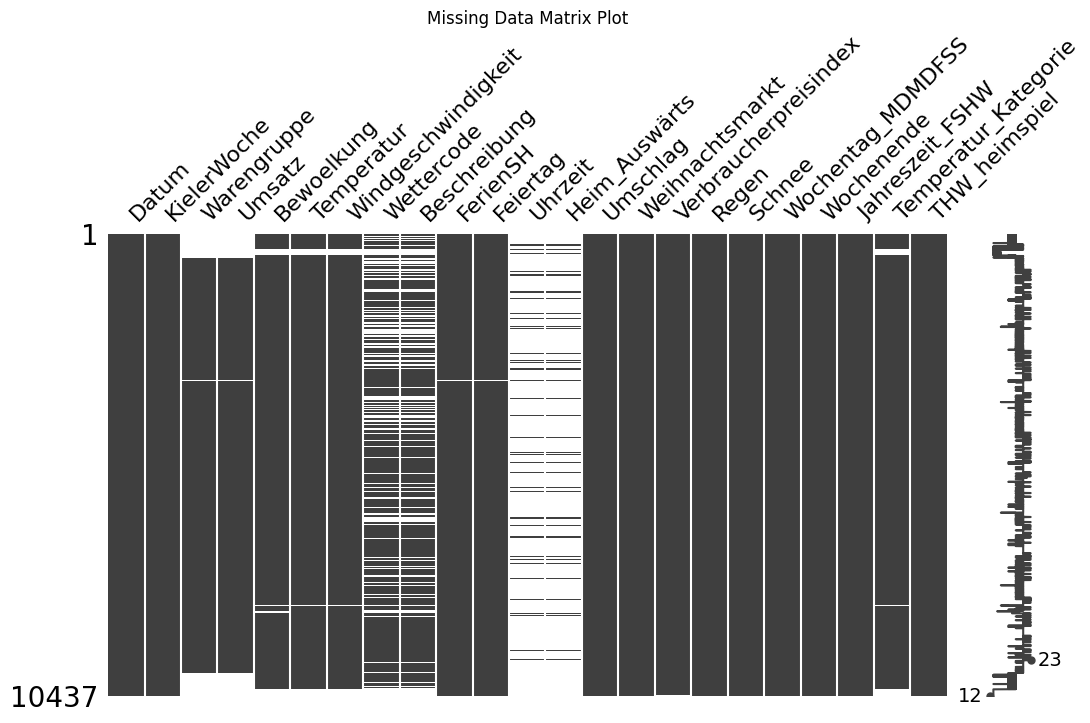

In [14]:
# Matrix plot of missing data
msno.matrix(dataf, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/missingno/missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


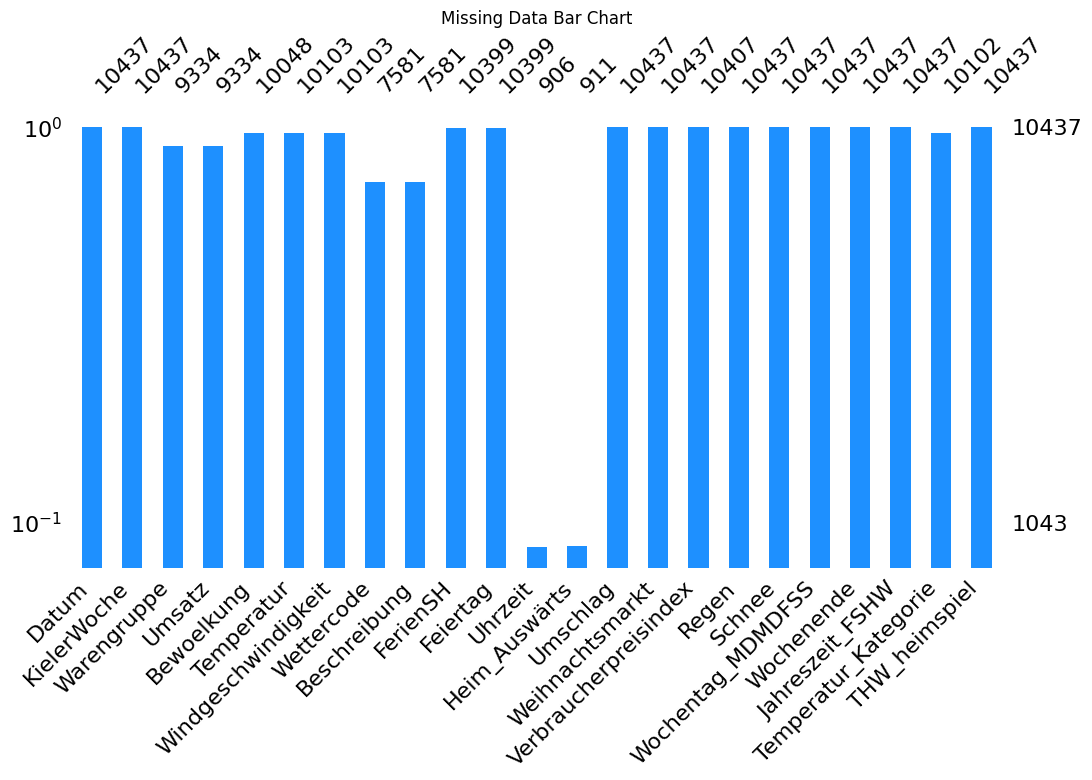

In [15]:
# Bar plot of missing data
msno.bar(dataf, color="dodgerblue", log=True, figsize=(12, 6))
plt.title('Missing Data Bar Chart')
plt.show()

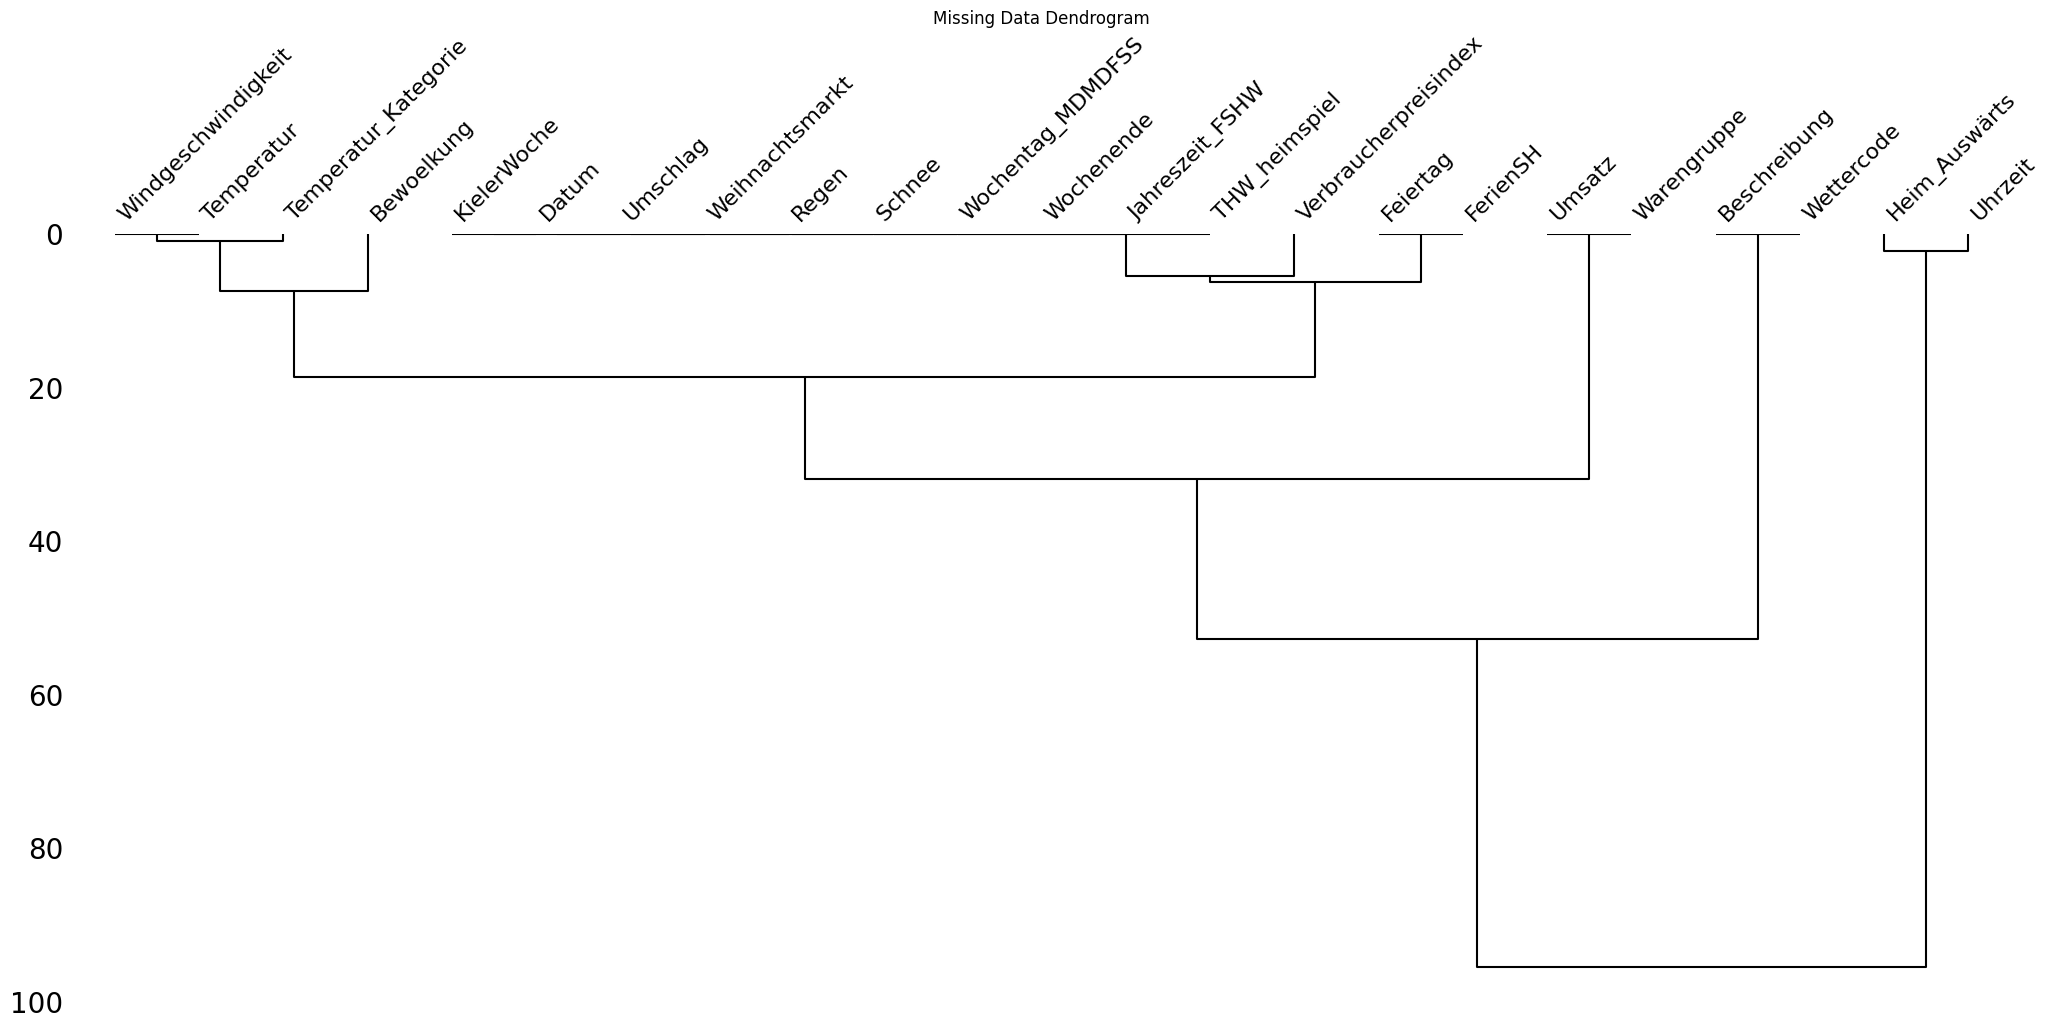

In [16]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(dataf)
plt.title('Missing Data Dendrogram')
plt.show()